In [66]:
import pandas as pd

In [67]:
df=pd.read_csv('Training Dataset.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
numerical=[df['ApplicantIncome'],df['CoapplicantIncome'],df['LoanAmount'],df['Loan_Amount_Term'],df['Credit_History']]
categorical=[df['Gender'],df['Married'],df['Dependents'],df['Education'],df['Self_Employed'],df['Property_Area'],df['Loan_Status']]

In [71]:
df=df.drop('Loan_ID',axis=1)
for i in numerical:
    i.fillna(i.mean(),inplace=True)
for i in categorical:
    i.fillna(i.mode()[0],inplace=True) #there can be multiple modes

In [72]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

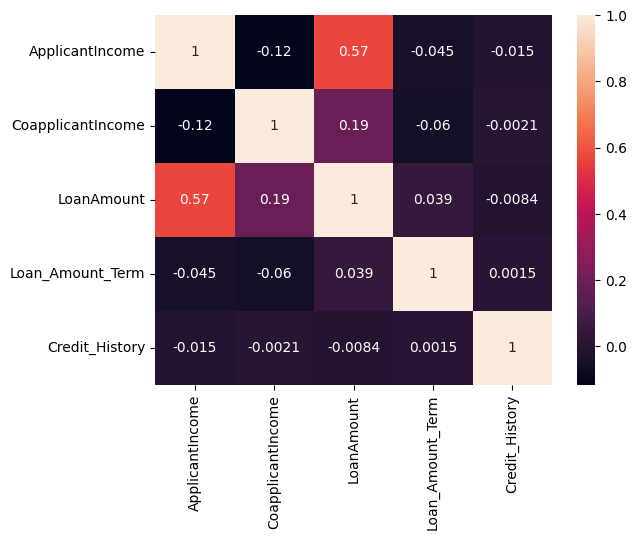

<Figure size 20000x20000 with 0 Axes>

In [73]:
#correlations heatmap
import seaborn as sns
import matplotlib.pyplot as plt
#only numeric columns
df1=df.select_dtypes(include='number')
corr=df1.corr()
sns.heatmap(corr,annot=True)
plt.figure(figsize=(200,200))
plt.show()



In [74]:

#label encoding
category=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in category:
  df[i]=le.fit_transform(df[i])


In [75]:
#split test train
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']



In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create and fit the logistic regression model
lr = LogisticRegression()
lr.fit(x_train_imputed, y_train)  # Use the imputed training data

y_pred = lr.predict(x_test_imputed)  # Use the imputed testing data
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8048780487804879


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train_imputed,y_train)
y_pred=rf.predict(x_test_imputed)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7642276422764228


In [79]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(x_train_imputed,y_train)
y_pred=rf.predict(x_test_imputed)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7642276422764228


In [ ]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gb=GradientBoostingClassifier()
gb.fit(x_train_imputed,y_train)
y_pred=gb.predict(x_test_imputed)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)